In [1]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')
data.head()

,Type of Travel,Online Boarding,In-flight Wifi Service,Ease of Online Booking,Age,In-flight Entertainment,Flight Distance,Departure and Arrival Time Convenience,Seat Comfort,Class,Cleanliness,On-board Service,Leg Room Service,Loyalty
0,0,3.0,3.0,3.0,48,5.0,821,3.0,5.0,0,5.0,3.0,2.0,1
1,0,5.0,2.0,2.0,35,5.0,821,2.0,4.0,0,5.0,5.0,5.0,4
2,0,5.0,4.0,4.0,41,3.0,853,4.0,5.0,0,5.0,3.0,3.0,4
3,0,4.0,2.0,2.0,50,5.0,1905,2.0,5.0,0,4.0,5.0,5.0,4
4,0,5.0,3.0,3.0,49,3.0,3470,3.0,4.0,0,5.0,3.0,4.0,4


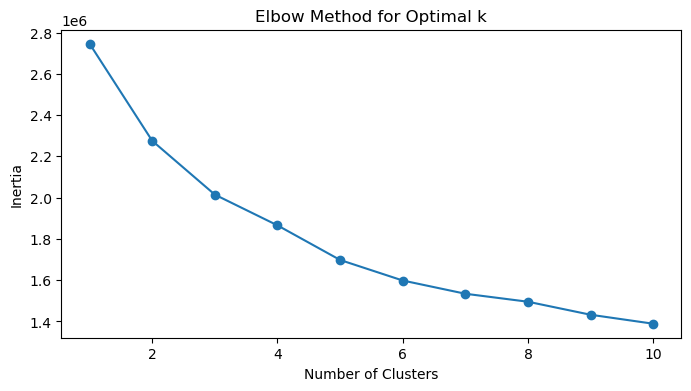

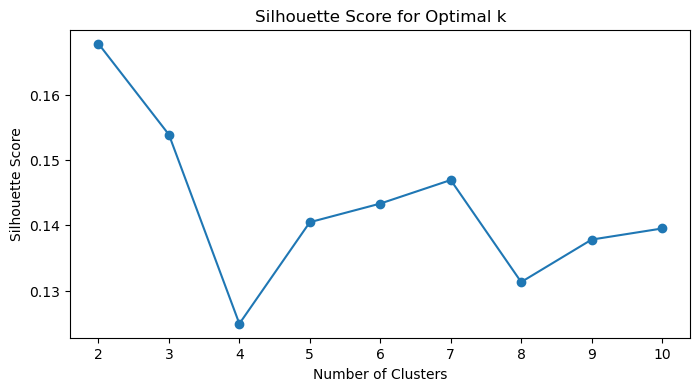

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Determine Optimal Number of Clusters
# Using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using the Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
        silhouette_scores.append(score)
    print(f'Silhouette Score for {k} clusters: {score:.4f}')  # Print silhouette score for each k

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()



In [49]:
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for {k} clusters: {score}")


print(f"Cluster range: {cluster_range},Inertia: {inertia}")

Silhouette Score for 2 clusters: 0.16784790369766134
Silhouette Score for 3 clusters: 0.15390930956677687
Silhouette Score for 4 clusters: 0.1249148902880883
Silhouette Score for 5 clusters: 0.1404796761588608
Silhouette Score for 6 clusters: 0.14333716896991391
Silhouette Score for 7 clusters: 0.14694834565387604
Silhouette Score for 8 clusters: 0.13130534454037246
Silhouette Score for 9 clusters: 0.13781516962117896
Silhouette Score for 10 clusters: 0.13951793855180264
Cluster range: range(1, 11),Inertia: [2746016.0000000014, 2275413.213380236, 2014523.277948332, 1865570.6329306536, 1697844.3373956787, 1598233.7243029415, 1534063.0799210127, 1495357.3962212023, 1432292.2885068916, 1388789.4660636156]


[0.16784790369766134, 0.15390930956677687, 0.1249148902880883, 0.1404796761588608, 0.14333716896991391, 0.14694834565387604, 0.13130534454037246, 0.13781516962117896, 0.13951793855180264]
Cluster Profiles:
          Type of Travel  Online Boarding  In-flight Wifi Service  \
Cluster                                                            
0              0.007026         4.301515                4.351773   
1              0.000316         2.220978                2.054069   
2              0.998943         2.452687                2.418103   
3              0.993565         3.212072                2.634029   
4              0.016275         4.125425                4.237996   
5              0.001131         4.149944                2.225436   
6              0.005685         2.629232                2.560555   

         Ease of Online Booking        Age  In-flight Entertainment  \
Cluster                                                               
0                      4.288128  36.27

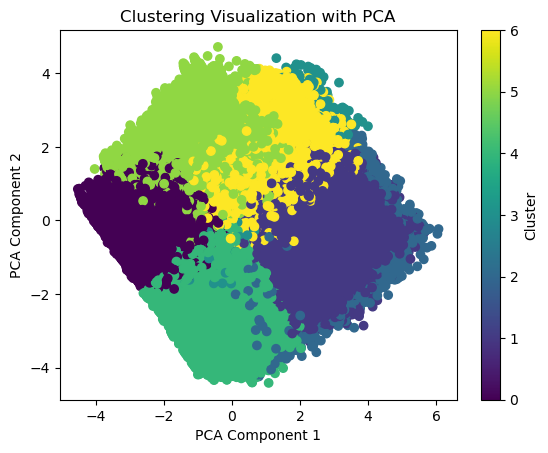

In [53]:
print(silhouette_scores)

# Step 4: Fit K-Means with the chosen number of clusters
optimal_k = 7  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_original['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

In [55]:
print(silhouette_scores)

# Step 4: Fit K-Means with the chosen number of clusters
optimal_k = 7  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_original['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

NameError: name 'scaled_data' is not defined

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Implement DBSCAN with adjusted parameters to reduce the number of clusters
    eps_value = 1.5  # Try increasing the eps value
min_samples_value = 10  # Try increasing min_samples to require more points per cluster

# Fit DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

# Calculate the number of clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate Silhouette Score if there are more than one clusters
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score: Not applicable (only one cluster found)")

# Step 4: Add Clustering Results to the Original Data
X_original['Cluster'] = labels
data['Cluster'] = labels

# Step 5: Analyze Cluster Profiles (ignoring noise points if present)
cluster_profiles = X_original[X_original['Cluster'] != -1].groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Optional: Visualize clustering results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

IndentationError: unexpected indent (1731622787.py, line 17)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Implement DBSCAN with adjusted parameters to reduce the number of clusters
eps_value = 3  # Try increasing the eps value
min_samples_value = 30  # Try increasing min_samples to require more points per cluster

# Fit DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

# Calculate the number of clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate Silhouette Score if there are more than one clusters
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score: Not applicable (only one cluster found)")

# Step 4: Add Clustering Results to the Original Data
X_original['Cluster'] = labels
data['Cluster'] = labels

# Step 5: Analyze Cluster Profiles (ignoring noise points if present)
cluster_profiles = X_original[X_original['Cluster'] != -1].groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Optional: Visualize clustering results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Determine Optimal Number of Clusters using GMM
# Using Bayesian Information Criterion (BIC) and Silhouette Score
bic_scores = []
silhouette_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))  # BIC score for model evaluation
    silhouette_scores.append(silhouette_score(X_scaled, labels))  # Silhouette score for comparison

# Plot BIC Scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Gaussian Mixture Models')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Gaussian Mixture Models')
plt.show()



In [ ]:
# Step 4: Fit GMM with the chosen number of clusters
optimal_k = 5  # Replace this with the chosen number of clusters based on BIC and Silhouette Score
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
X_original['Cluster'] = gmm.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA (GMM)')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')
data.head()

In [ ]:
data.describe()

In [ ]:
# Step 2: Preprocessing
# Drop the 'Loyalty' column as it's the target variable and scale the features
features = data.drop(columns=['Loyalty'])
target = data['Loyalty']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Dimensionality reduction (optional, for visualization)
# Reduce to 2D for plotting purposes using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Step 4: Apply Gaussian Mixture Model
# Determine the optimal number of clusters using Silhouette Score
sil_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, cluster_labels)
    sil_scores.append(sil_score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid()
plt.show()

# Optimal number of clusters
optimal_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal Number of Clusters: {optimal_clusters}")

# Fit GMM with optimal clusters
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
cluster_labels = gmm.fit_predict(scaled_features)

# Step 5: Add cluster labels to the original dataset
data['Cluster'] = cluster_labels
print("\nSample Data with Cluster Labels:")
print(data.head())

# Step 6: Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=cluster_labels, 
    palette='viridis', 
    s=50
)
plt.title("Clusters Visualization (2D PCA)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 7: Cluster Summary
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Statistics:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())

# Step 8: Evaluate Clustering Quality
print("\nSilhouette Score with Optimal Clusters:", silhouette_score(scaled_features, cluster_labels))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
# Step 6: Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=cluster_labels, 
    palette='viridis', 
    s=50
)
plt.title("Clusters Visualization (2D PCA)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 7: Cluster Summary
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Statistics:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())

# Step 8: Evaluate Clustering Quality
print("\nSilhouette Score with Optimal Clusters:", silhouette_score(scaled_features, cluster_labels))

In [ ]:

# Fit GMM with optimal clusters
gmm = GaussianMixture(n_components=4, random_state=42)
cluster_labels = gmm.fit_predict(scaled_features)

# Step 5: Add cluster labels to the original dataset
data['Cluster'] = cluster_labels
print("\nSample Data with Cluster Labels:")
print(data.head())

# Step 6: Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=cluster_labels, 
    palette='viridis', 
    s=50
)
plt.title("Clusters Visualization (2D PCA)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 7: Cluster Summary
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Statistics:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())

# Step 8: Evaluate Clustering Quality
print("\nSilhouette Score with Optimal Clusters:", silhouette_score(scaled_features, cluster_labels))

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Force the number of clusters to 4
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(x)  # X is your dataset

# Predict the cluster labels
labels = gmm.predict(X)
x['Cluster'] = labels

# Evaluate the new clustering
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, labels)
print(f'Silhouette Score with 4 Clusters: {silhouette}')